**Importing tensorflow**

In [1]:
import tensorflow as tf

**Importing MNIST Dataset**

In [2]:
mnist = tf.keras.datasets.mnist

**Splitting the MNIST dataset into Training and Testing**

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

**As this Dataset is alreeady in vectorized form So checking the first image's array**

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Checking Label**

In [5]:
y_train[0]

5

**Checking the shape of dataset that we splitted into Training and Testing**

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Checking the Dimensions of dataset that we splitted into Training and Testing**

In [7]:
print(x_train.ndim)
print(x_test.ndim)
print(y_train.ndim)
print(y_test.ndim)

3
3
1
1


**Checking the visual form**

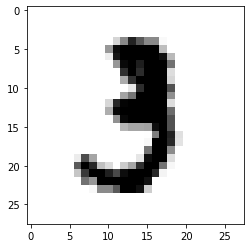

In [9]:
import matplotlib.pyplot as plt
digit = x_train[10]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

**Checking the label of Image we just visualized**

In [10]:
y_train[10]

3

**1- Changing Dimension of train sets into 2**

**2- As you can see above there are multiple values between 0 to 255 and 255 is Max value so what we're doing is managing the values between 0 and 1 by dividing the train sets by 255.**

In [11]:
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

x_train, x_test = x_train/255.0, x_test/255.0

**Checking Dimension**

In [12]:
print(x_train.ndim)
print(x_test.ndim)

2
2


In [13]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**One hot encoding**

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Building Neural Network**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (28 * 28,)))
model.add(Dense(10, activation = "softmax"))

**Model Compilation**

In [17]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

**Checking our Training Accuracy of Model by passing training sets**

In [18]:
model.fit(x_train, y_train, epochs = 6, batch_size = 128)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2682 - accuracy: 0.9244
Epoch 2/6
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1100 - accuracy: 0.9673
Epoch 3/6
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0724 - accuracy: 0.9792
Epoch 4/6
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0515 - accuracy: 0.9848
Epoch 5/6
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0383 - accuracy: 0.9888
Epoch 6/6
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0283 - accuracy: 0.9923


**Checking our Testing Accuracy of Model by passing training sets**

In [20]:
loss, acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 125us/sample - loss: 0.0607 - accuracy: 0.9814


In [21]:
print("Loss: ", loss)
print("Accuracy: ", acc)

Loss:  0.06065777425533161
Accuracy:  0.9814


**Prediction**

In [23]:
model.predict_classes(x_test)[0]

7

In [27]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)